# Итоговое тестирование

Загрузите файл `salary_fix.csv`. 

Кодировка: `CP1251`, разделители: `«;»`.

В файле представлены данные о заработной плате профессорско-преподавательского состава университета:

|Поле|Содержание|
|:-|:-|
|`'Т/Н'`|табельный номер, уникальный идентификатор работника
|`'Должность'`|должность работника (одна из занимаемых должностей)
|`'Ставка'`|часть ставки, на которую заключен трудовой договор по данной должности в данном подразделении
|`'Оклад (основной)'`|
|`'Оклад (совместительство)'`|
|`'Почасовая оплата'`|Сумма почасовой оплаты труда (обычно сверх оклада)
|`'Итого'`|общая сумма заработной платы

Обратите внимание, сотрудники идентифицируются по табельному номеру, на некоторых работников есть несколько записей – у них есть внутреннее совместительство.

Существуют сотрудники, у которых есть зарплата только по основному месту работы, есть основное и внутреннее совместительство - это штатные сотрудники. Есть внешние совместители – у них нет оклада по основному месту работы в данной организации.

Необходимо написать программу на Python с использованием модулей `Pandas` и `Pyplot`, которая позволяет получить аналитику данных.

In [99]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [100]:
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
# Загрузка данных
file_path = 'salary_fix.csv'
data = pd.read_csv(file_path, encoding='cp1251', delimiter=';', decimal=',')
data.head()

,ТН,Должность,Ставка,Оклад (основной),Оклад (совместительство),Почасовая оплата,Итого
0,160697,Доцент,1.50,9830.0,4915.0,5284.76,21663.83
1,2226,Доцент,0.50,4915.0,NaN,NaN,7185.72
2,302429,Доцент,0.05,NaN,491.5,NaN,534.51
3,302429,Доцент,0.45,NaN,4423.5,NaN,4810.56
4,1139,Доцент,1.20,9830.0,1966.0,NaN,16231.29


1. (1 балл) Выведите Фонд оплаты труда(ФОТ):

a) всей организации (`r1a`)

b) в разрезе должностей (`r1b`)

c) ФОТ организации без учёта внешних совместителей (`r1c`)

d) ФОТ внешних совместителей (`r1d`).

In [102]:
# r1a ФОТ всей организации
fund_total = data['Итого'].sum(skipna=True)
print(f"ФОТ всей организации: {fund_total:.3f}\n")

# r1b ФОТ в разрезе должностей
fund_by_position = data.groupby('Должность')['Итого'].sum().reset_index()
print(f"ФОТ в разрезе должностей:\n")
for index, row in fund_by_position.iterrows():
    print(f"   Должность: {row['Должность']}, ФОТ: {row['Итого']:.3f}\n")

# r1c ФОТ организации без учёта внешних совместителей
internal_employees = data[data['Оклад (основной)'].notna()]
fund_total_internal = internal_employees['Итого'].sum(skipna=True)
print(f"ФОТ без учёта внешних совместителей: {fund_total_internal:.3f}\n")

# r1d ФОТ внешних совместителей
external_employees = data[data['Оклад (основной)'].isna()]
fund_total_external = external_employees['Итого'].sum(skipna=True)
print(f"ФОТ внешних совместителей: {fund_total_external:.3f}\n")

ФОТ всей организации: 10679949.920

ФОТ в разрезе должностей:

   Должность: Ассистент, ФОТ: 1034563.400

   Должность: Доцент, ФОТ: 5271273.010

   Должность: Преподаватель, ФОТ: 452619.670

   Должность: Профессор, ФОТ: 1440885.750

   Должность: Старший преподаватель, ФОТ: 2480608.090

ФОТ без учёта внешних совместителей: 9820882.830

ФОТ внешних совместителей: 859067.090



2. (1 балл) Выведите данные о структуре персонала по должностям и ставкам и постройте круговую диаграмму


Структура персонала по должностям и ставкам:
                  Должность  Ставка  Количество
0                Ассистент    0.10           4
1                Ассистент    0.15           3
2                Ассистент    0.20           4
3                Ассистент    0.25          22
4                Ассистент    0.30           8
..                     ...     ...         ...
113  Старший преподаватель    1.30           5
114  Старший преподаватель    1.35           8
115  Старший преподаватель    1.40           2
116  Старший преподаватель    1.45           3
117  Старший преподаватель    1.50          68

[118 rows x 3 columns]



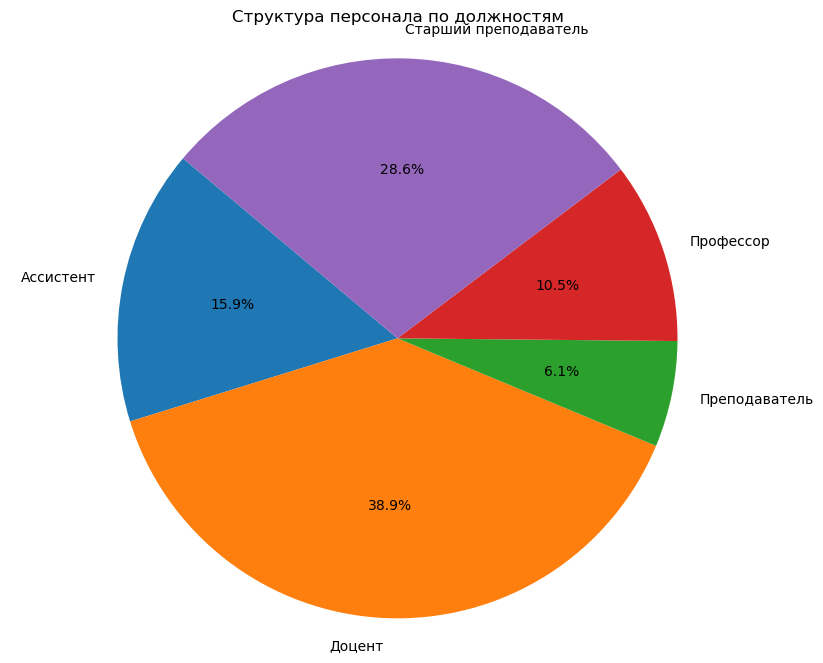

In [103]:
# Группировка данных по должностям и подсчет ставок
structure = data.groupby(['Должность', 'Ставка']).size().reset_index(name='Количество')
print(f"Структура персонала по должностям и ставкам:\n {structure}\n")

# Данные для круговой диаграммы
# Суммируем количество сотрудников по должностям
position_counts = structure.groupby('Должность')['Количество'].sum()

# Круговая диаграмма
plt.figure(figsize=(10, 8))
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Структура персонала по должностям')
plt.axis('equal')
plt.show()

3. (1 балл) Проанализируйте заработную плату ассистентов:
    
- выведите минимальную (`r3a`)
- среднюю (`r3b`)
- максимальную заработную плату (`r3c`)

по этой категории

Минимальная заработная плата ассистентов: 1046.480
Средняя заработная плата ассистентов: 7234.709
Максимальная заработная плата ассистентов: 20019.500


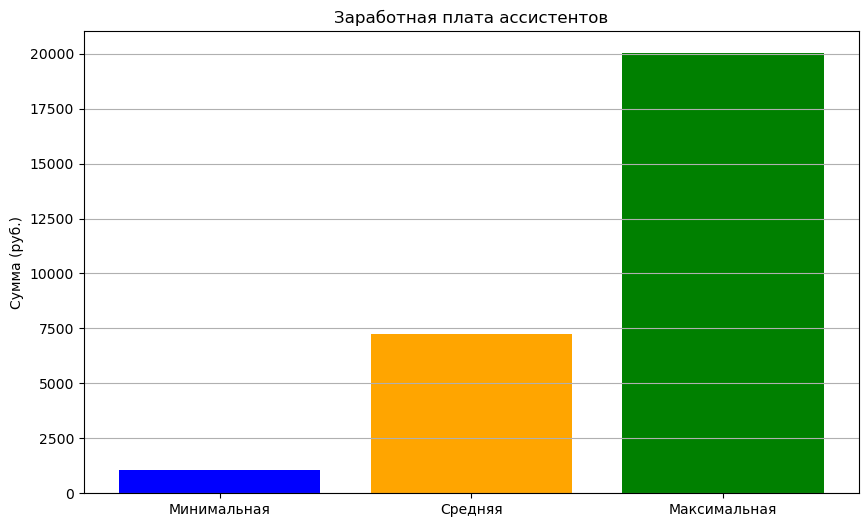

In [104]:
# Фильтрация данных для ассистентов
assistants = data[data['Должность'].str.contains('ассистент', case=False, na=False)]

# Анализ заработной платы ассистентов
min_salary = assistants['Итого'].min()
mean_salary = assistants['Итого'].mean()
max_salary = assistants['Итого'].max()

# Вывод результатов
print(f"Минимальная заработная плата ассистентов: {min_salary:.3f}")
print(f"Средняя заработная плата ассистентов: {mean_salary:.3f}")
print(f"Максимальная заработная плата ассистентов: {max_salary:.3f}")

# График
plt.figure(figsize=(10, 6))
plt.bar(['Минимальная', 'Средняя', 'Максимальная'], [min_salary, mean_salary, max_salary], color=['blue', 'orange', 'green'])
plt.title('Заработная плата ассистентов')
plt.ylabel('Сумма (руб.)')
plt.grid(axis='y')
plt.show()

4. (1 балл) Проанализируйте доцентов-внешних совместителей. Выведите таблицу с их группировкой по табельному номеру, представьте в таблице общую величину ставки и сумму заработной платы (DataFrame `r4a` с `columns=['Ставка', 'Итого']`). 

Выведите их численность с учётом группировки – `r4b`.

In [105]:
# Внешние совместители не имеют оклада по основному месту работы
external_part_time = data[data['Оклад (основной)'].isna()]

# Группировка по табельному номеру
th_group = external_part_time.groupby('ТН').agg(
    Ставка=('Ставка', 'sum'),
    Итого=('Итого', 'sum')
).reset_index()

# Вывод результатов
print("Таблица с группировкой внешних совместителей:")
print(th_group)

print("\nЧисленность внешних совместителей:", th_group.shape[0])

Таблица с группировкой внешних совместителей:
         ТН  Ставка    Итого
0       256    0.50  4137.81
1       527    0.25  3592.87
2      1006    0.05   448.27
3      1032    0.10  1352.61
4      1050    0.50  4361.18
..      ...     ...      ...
195  303513    0.40  3707.90
196  303537    0.10  1352.61
197  303556    0.40  8002.23
198  303559    0.15  1125.30
199  303606    0.25  4680.54

[200 rows x 3 columns]

Численность внешних совместителей: 200


5. (1 балл) Проанализируйте заработную плату работников (с учётом совместительства), работающих в данной организации по основному месту работы. Выведите минимальную (`r5a`), среднюю (`r5b`) и максимальную заработную плату (`r5c`) по этой категории.

Минимальная заработная плата: 80.190
Средняя заработная плата: 12145.640
Максимальная заработная плата: 23537.250


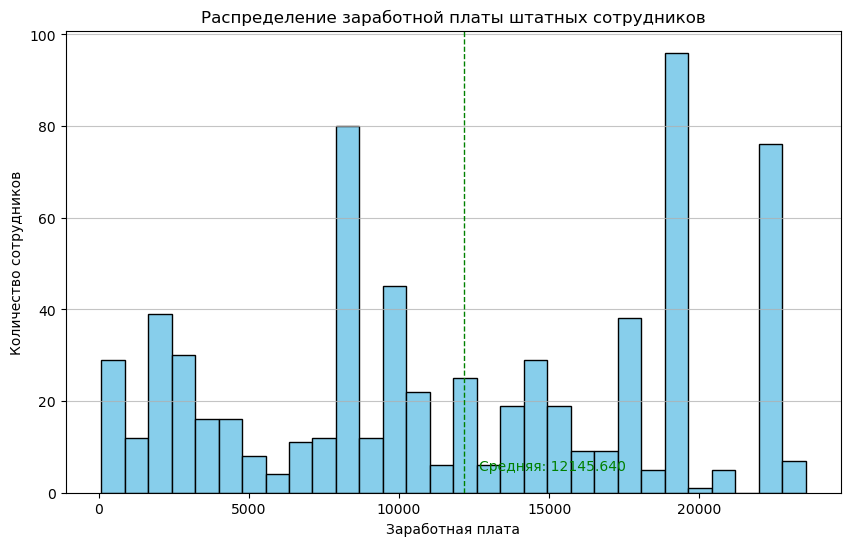

In [106]:
# Штатные сотрудники имеют ненулевой оклад по основному месту работы
full_time_employees = data[data['Оклад (основной)'].notna()]

# Вычисление общей заработной платы для штатных сотрудников
full_time_employees.loc[:, 'Итого'] = (full_time_employees['Оклад (основной)'] + full_time_employees['Оклад (совместительство)'].fillna(0)) * full_time_employees['Ставка']

# Вычисление минимальной, средней и максимальной заработной платы
min_salary = full_time_employees['Итого'].min()
mean_salary = full_time_employees['Итого'].mean()
max_salary = full_time_employees['Итого'].max()
print(f'Минимальная заработная плата: {min_salary:.3f}')
print(f'Средняя заработная плата: {mean_salary:.3f}')
print(f'Максимальная заработная плата: {max_salary:.3f}')

# График распределения заработной платы
plt.figure(figsize=(10, 6))
plt.hist(full_time_employees['Итого'], bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение заработной платы штатных сотрудников')
plt.xlabel('Заработная плата')
plt.ylabel('Количество сотрудников')
plt.grid(axis='y', alpha=0.75)
plt.axvline(mean_salary, color='green', linestyle='dashed', linewidth=1)
plt.text(mean_salary + 500, 5, f'Средняя: {mean_salary:.3f}', color='green')
plt.show()

6. (1 балл) Проведите анализ ставок внешних совместителей: выведите минимальную (`r6a`), среднюю (`r6b`) и максимальную ставку (`r6c`) по этой категории.

Минимальная ставка внешних совместителей: 0.05
Средняя ставка внешних совместителей: 0.3424882629107981
Максимальная ставка внешних совместителей: 0.5


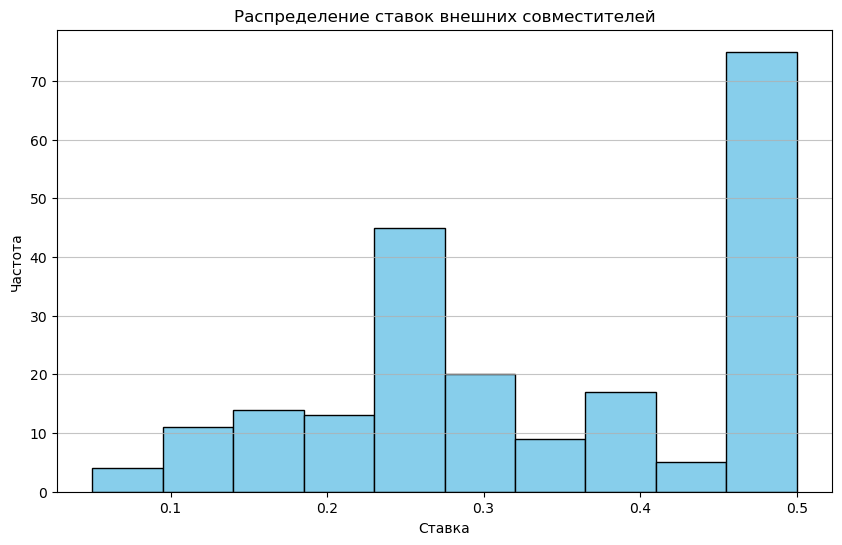

In [107]:
# Внешние совместители не имеют оклада по основному месту работы
external_part_time = data[data['Оклад (основной)'].isna()]

# Вычисление минимальной, средней и максимальной заработной платы
min_rate = external_part_time['Ставка'].min()
mean_rate = external_part_time['Ставка'].mean()
max_rate = external_part_time['Ставка'].max()
print(f'Минимальная ставка внешних совместителей: {min_rate}')
print(f'Средняя ставка внешних совместителей: {mean_rate}')
print(f'Максимальная ставка внешних совместителей: {max_rate}')

# График распределения ставок внешних совместителей
plt.figure(figsize=(10, 6))
plt.hist(external_part_time['Ставка'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title('Распределение ставок внешних совместителей')
plt.xlabel('Ставка')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()

7. (1 балл) Выведите список табельных номеров доцентов, работающих на 1,0 ставку (`r7a`)

In [108]:
# Получаем табельные номера доцентов с 1,0 ставкой
docents_full_time = data[(data['Должность'] == 'Доцент') & (data['Ставка'] == 1.0)]

# Вывод списка табельных номеров
tabel_numbers = docents_full_time['ТН'].tolist()
print("Табельные номера доцентов, работающих на 1,0 ставку:")
print(*tabel_numbers, sep="\n")

Табельные номера доцентов, работающих на 1,0 ставку:
74317
1651
540
2328
1204
103707
73454
165021
114
577
70812
2937
165283
74763
300848
1576
2327
160954
105887
1504
2383
1250
100364
74332
4544
3027
5703
167182
2257
164775
160830
2774
2403
2012
5230
2263
2293
2454
302474
1595
103197
585
1616
141369
155716
70766
106038
74326
161208
303567
103087


8. (1 балл) Найдите самых незагруженных по основному месту работы сотрудников и выведите их табельные номера и ставку (`r8a`).

In [109]:
# Штатные сотрудники имеют ненулевой оклад по основному месту работы
full_time_employees = data[data['Оклад (основной)'].notna()]

# Группировка данных по табельному номеру и суммирование ставок
grouped_data = full_time_employees.groupby('ТН').agg({'Ставка': 'sum'}).reset_index()

# Сортировка по ставке (от меньшей к большей)
sorted_data = grouped_data.sort_values(by='Ставка')

# Получение самых незагруженных сотрудников
least_loaded_employees = sorted_data.head()
print(f"5 самых незагруженных по основному месту работы сотрудников:\n{least_loaded_employees}")

5 самых незагруженных по основному месту работы сотрудников:
         ТН  Ставка
260   70032     0.1
438  301469     0.1
17      583     0.1
244    8593     0.1
129    2018     0.1


9. (2 балла) Постройте графики формирования ФОТ от меньших зарплат к большим для:

а) всей организации;

б) работников, чьё основное место работы находится в организации (с учётом внутреннего совместительства);

в) внешних совместителей.


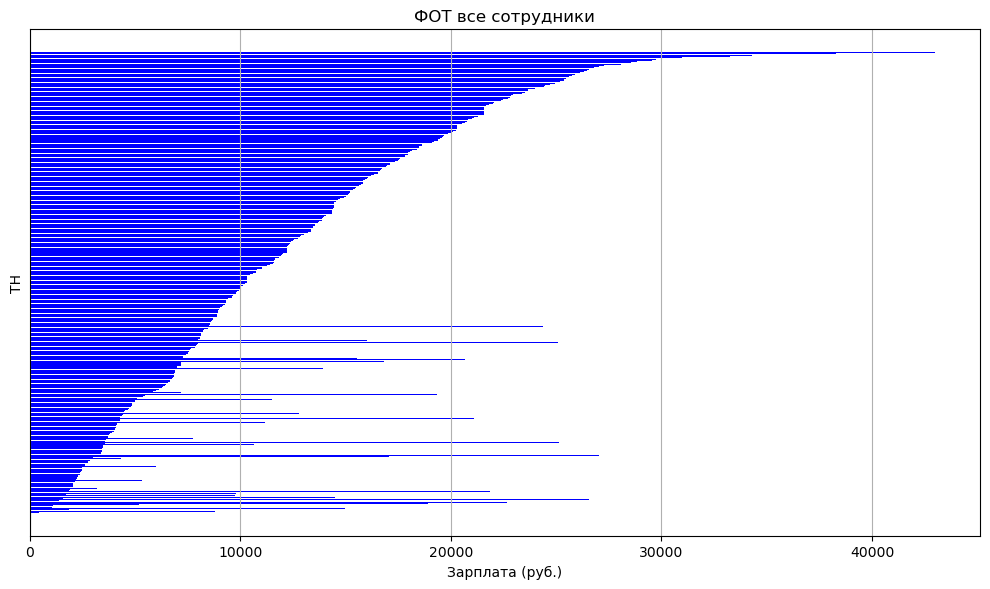

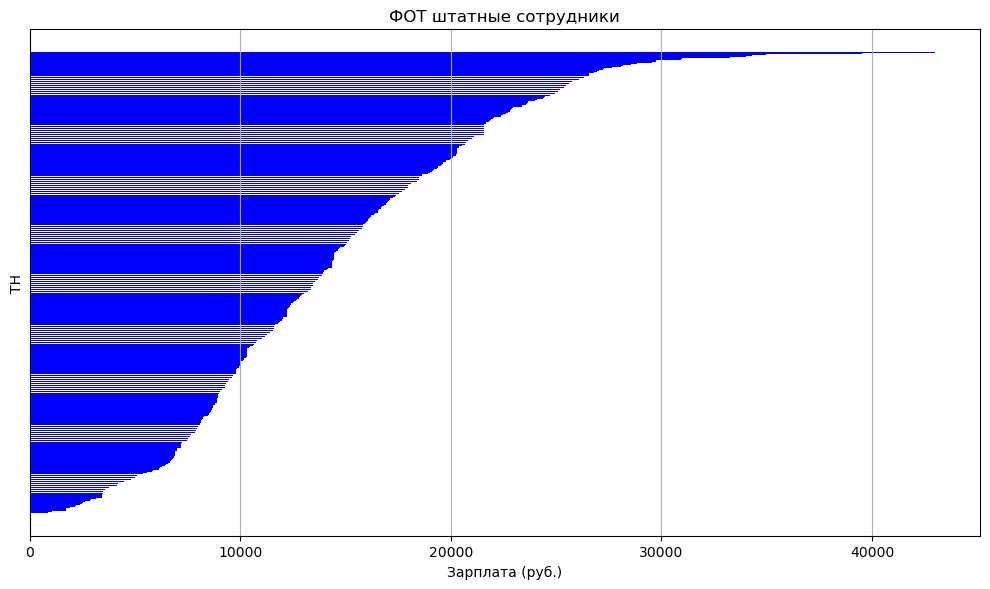

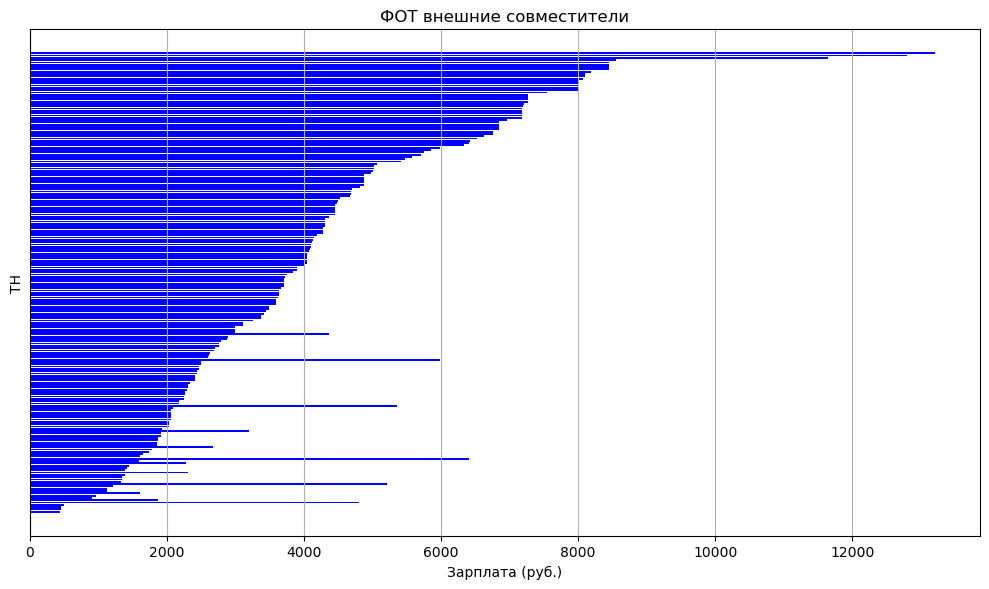

In [114]:
# Удаляем строки с пропущенными значениями в столбце 'Итого'
data.dropna(subset=['Итого'], inplace=True)

# Все сотрудники
all_salaries = data.sort_values(by='Итого')

# Штатные сотрудники
staff_salaries = data[data['Оклад (основной)'].notna()].sort_values(by='Итого')

# Внешние совместители
external_salaries = data[data['Оклад (основной)'].isna() & data['Оклад (совместительство)'].notna()].sort_values(by='Итого')

# Построения графика
def plot_salaries(salaries, title):
    plt.figure(figsize=(10, 6))
    plt.barh(salaries['ТН'].astype(str), salaries['Итого'], color='blue')
    plt.xlabel('Зарплата (руб.)')
    plt.ylabel('ТН')
    plt.yticks([])
    plt.title(title)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

# Графики
plot_salaries(all_salaries, 'ФОТ все сотрудники')
plot_salaries(staff_salaries, 'ФОТ штатные сотрудники')
plot_salaries(external_salaries, 'ФОТ внешние совместители')